# Regresión logística para predicciones bancarias.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("../../datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [18]:
data.shape

(4119, 21)

In [19]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [146]:
data["y"] = (data["y"] == "yes").astype(int)

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [22]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [23]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [24]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [25]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [26]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [27]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

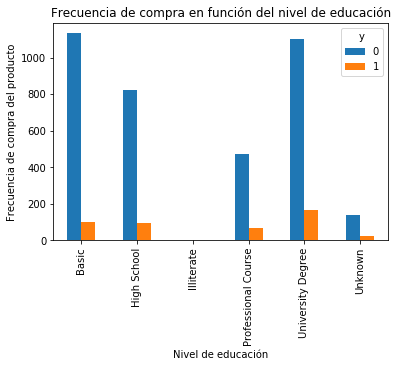

In [28]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

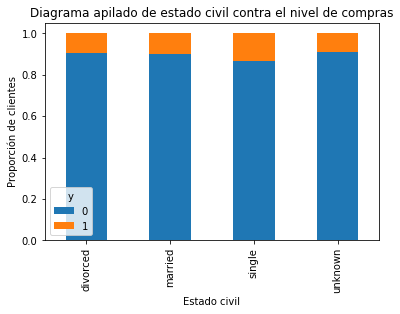

In [29]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

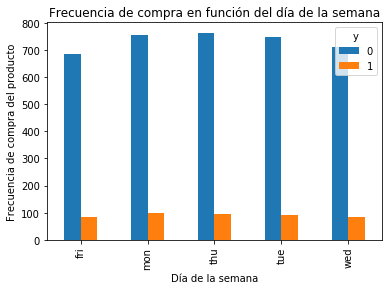

In [30]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

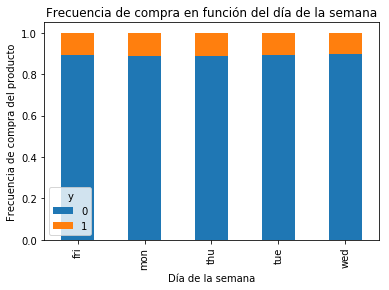

In [31]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

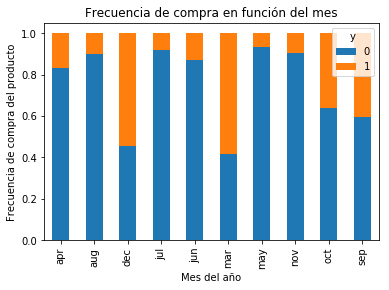

In [32]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

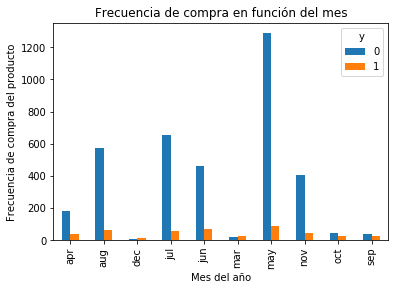

In [33]:
%matplotlib inline
table.plot(kind = "bar", stacked = False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

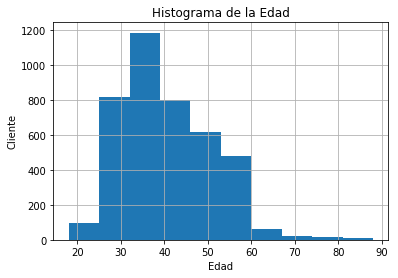

In [34]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

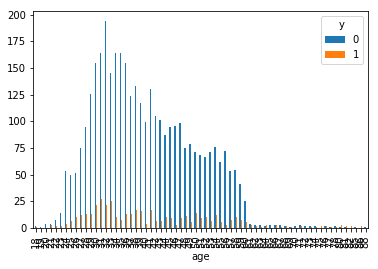

In [35]:
pd.crosstab(data.age, data.y).plot(kind = "bar")

In [36]:
pd.crosstab(data.poutcome, data.y)

y,0,1
poutcome,,
failure,387,67
nonexistent,3231,292
success,50,92


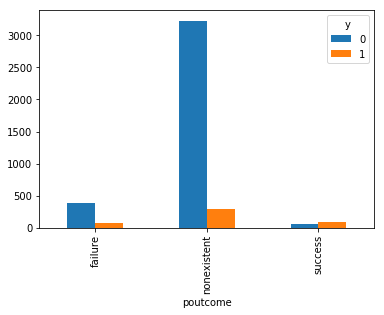

In [37]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")

# Conversión de variables categóricas

In [38]:
data = pd.read_csv("../../datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [39]:
categories = ["job", "marital", "education", "default", "housing", 
              "loan", "contact", "month", "day_of_week", "poutcome"]

In [40]:
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix = category)
    #print(cat_dummies)
    data_new = data.join(cat_dummies)
    data = data_new

In [41]:
data_vars = data.columns.values.tolist()

In [42]:
to_keep = [v for v in data_vars if v not in categories]

In [43]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [44]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

## Seleción de rasgospara el modelo.

In [45]:
n = 12

In [46]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

c:\users\jorge\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [47]:
lr = LogisticRegression()

In [48]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\si

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\si

In [49]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True  True  True False False False False False False False
  True False  True]


In [50]:
print(rfe.ranking_)

[38 42 20 50  1 19 28 25  1 41 24  4  1 39  1 43  1  6 30 34 12 44 21 49
 32 52 36 13 46 27 45 14 15  8 48 37 51 10 22 23 16  7 33 18  3  1  5  1
 35  2  1  1  1 26 17 40 29 47 31 11  1  9  1]


In [51]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 38),
 ('duration', False, 42),
 ('campaign', False, 20),
 ('pdays', False, 50),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 28),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 41),
 ('y', False, 24),
 ('job_admin.', False, 4),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', True, 1),
 ('job_management', False, 43),
 ('job_retired', True, 1),
 ('job_self-employed', False, 6),
 ('job_services', False, 30),
 ('job_student', False, 34),
 ('job_technician', False, 12),
 ('job_unemployed', False, 44),
 ('job_unknown', False, 21),
 ('marital_divorced', False, 49),
 ('marital_married', False, 32),
 ('marital_single', False, 52),
 ('marital_unknown', False, 36),
 ('education_basic.4y', False, 13),
 ('education_basic.6y', False, 46),
 ('education_basic.9y', False, 27),
 ('education_high.school', False, 45),
 ('education_illiterate', False, 14),
 ('education_professional.cours

In [52]:
data = pd.read_csv("../../datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [53]:
cols = ["previous", 
        "euribor3m",
        "job_blue-collar",
        "job_retired", 
        "month_aug", 
        "month_dec", 
        "month_jul", 
        "month_jun", 
        "month_mar", 
        "month_nov", 
        "day_of_week_wed", 
        "poutcome_nonexistent"]

In [54]:
X = bank_data[cols]
Y = bank_data["y"]

# Implementar del modelo en Python con statsmodels.api

In [55]:
import statsmodels.api as sm

c:\users\jorge\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\jorge\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [58]:
logit_model = sm.Logit(Y, X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [59]:
result = logit_model.fit()

NameError: name 'logit_model' is not defined

In [60]:
result.summary2()

NameError: name 'result' is not defined

# Implementación del modelo en Python con scikit-learn.

In [61]:
from sklearn import linear_model

In [62]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
logit_model.score(X, Y)

0.8963340616654528

In [64]:
Y.mean()

TypeError: Could not convert nononononononononononononononononononoyesnoyesnononoyesnononononononononononononononononononononononononononoyesnononononoyesnonoyesnononononoyesnoyesyesnonoyesnonononononononononononoyesyesnonononononononononononononononononononononononononoyesnonononononononononononoyesnononoyesnonoyesnononoyesnononoyesnonononononoyesnonoyesnononononononononononoyesnonononononononononononoyesyesnononononononoyesnonononononononoyesnononononononononononononononononononononononononononononononoyesnonononoyesnonononoyesnonononononononononononononononononononononoyesyesyesnonononononononononononononononononononononononoyesnononoyesnononononononononoyesnononononoyesnonononononoyesnonononononononononononononononononononononoyesnoyesnononononononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonononoyesnonononononononononononononononononononononoyesnoyesnonononononononononononononononononoyesnoyesnononononoyesnoyesnononoyesnonoyesnonononononoyesyesnonononononoyesnonononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononoyesnonononoyesnononononononoyesnononononoyesnonononononononononoyesyesnonononononoyesnonononononononononoyesnonononononononoyesnononononononononoyesnonononoyesyesnononononononononoyesnononoyesnonononononononononononononononononoyesnoyesyesnonoyesnononononononononoyesnonononoyesnononononoyesnononoyesnonononononoyesnonoyesnononononoyesnononononononononononononoyesnonononononononononononoyesyesnononononononoyesnoyesnonononononoyesnonononononononononononononononononononononononononononoyesnonononononononononononononononoyesnononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononoyesnonononononoyesnononoyesnonononononoyesnonononononononononoyesnonoyesnoyesnonononononoyesnononononononononononononononononononoyesnonoyesyesnonoyesyesyesnonononononononononononononononononononoyesnononononononononononononononononoyesyesnononononononononononononononononononononononononononoyesnonononononononononononoyesyesnononononononoyesnonononononoyesnoyesnonoyesnonononononononononoyesnoyesnononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesyesnonononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononononononoyesnonononononononononononoyesnonononononononononoyesnonononononononononononononoyesnononononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononoyesnonoyesnononononononononononononononononoyesnononononononononoyesnoyesnonononoyesnonononoyesnonononononononononoyesnonononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononoyesyesnonononoyesnoyesnonononononononononononononononononoyesyesnononononononononononononononononoyesnonononononononoyesyesnonononononononononononoyesnononononononononononononononoyesnoyesnononoyesnonononononononononononononoyesnoyesnonoyesnonoyesnonononononononoyesyesnoyesnonononoyesnononononononononononoyesnononoyesnononononononoyesnononoyesnononononononoyesyesnonoyesnoyesnoyesnonononononoyesyesnonononononoyesnononononononononoyesnoyesnonononononononononononononononononononononononoyesyesnonononononononononononononononononononononononononononononoyesyesnoyesnonoyesnononononononononononononononononononononononononononononononoyesnonononononononononoyesnonoyesnononoyesnononoyesnonononononononoyesnoyesnoyesnononoyesnononononononononononoyesnonononononononononononoyesyesnonoyesnonononononononoyesnononoyesnonoyesnonononoyesnoyesnonononononononononononononononononononononononononononononononononononononoyesnonononoyesnonononononononononononononoyesnononononononononoyesnoyesnoyesnononononononononononononononononononoyesnonononononononononononononoyesyesnonoyesnonononononononononononononoyesnononononononononononoyesnoyesnononoyesnononononononononononononononononoyesnononononoyesnoyesyesnonononononononononononononononononoyesnononononononononononoyesnononononoyesnonononoyesnonononononononononononononoyesnonononononononoyesnoyesnononoyesnonononononononononononononononononoyesnoyesnoyesnonononononononononononoyesnonononononononoyesnonononononoyesnoyesnonononononononononoyesnonononoyesnonononononononononononoyesnonononononononononoyesnononononoyesnononononononononononononoyesyesnononononononononoyesyesnononononononononononononononononononoyesnononononononononononononoyesyesnonononononononononononononononononononoyesnononoyesyesyesyesnonononononononononononononononoyesnononononononononononoyesnononononononononononononononononononononononoyesnonononononoyesnonononononoyesnonononononononoyesyesnonononononononononononononononononononononononononononoyesnononononononononononononononononoyesyesnoyesnoyesnonononoyesnonononononononoyesnononononoyesnonononononononononononoyesnononononononononononoyesnononononononoyesnonononononononononononoyesnonononononoyesnonononoyesyesyesnononononononoyesnonononoyesnonononoyesnonononononononoyesnonononononononoyesnononononononononononononononononononoyesnonononononoyesnoyesyesnononononononononononoyesnonononononononononononononononononononononoyesnonononononononononoyesnoyesnononononononoyesnonononononoyesnonoyesyesnonononononononononononoyesnononononononononononononononononononononoyesnoyesnonoyesyesnonononononononoyesnonononononoyesnonoyesnonononononononononononononononoyesnonononononoyesnonononononononononoyesnonoyesnononononononononoyesnonoyesnononoyesnonononoyesnononononononononononononoyesnonononononononononononoyesnoyesnononononononononononononononononononononoyesnonononononononononoyesnonononononononononononononoyesnononononononononononoyesnonononoyesnonononononoyesnononononoyesnonononononononononononononononononononononononoyesnoyesyesnonononononononononononononononoyesnonononononononoyesnoyesnononononononononononononononononoyesyesnonononononoyesnonononononoyesnoyesnononononononononoyesnoyesnononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononoyesnononononoyesnonononoyesyesnononoyesnononoyesnonononononononononononoyesnoyesnononononononononononononononononoyesnoyesnonononononononononoyesnonononononononoyesyesnonononoyesnononononoyesnonononononononoyesnononononononononononoyesnononononononononoyesyesyesnononononononononononononoyesnonononoyesnonononononononoyesnonononoyesnonoyesnonoyesnonononononononoyesnononononononoyesyesnoyesnononononononononononononononononononononononononononoyesnonononoyesnononononononoyesnoyesnonononoyesnononoyesnononoyesnononoyesyesnononononononononononononononononononononononoyesnononoyesnonononononononononononononononononononononononononoyesnononononononononoyesnononononononononononononononononoyesyesnonononononononoyesnonoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesyesnononononoyesnonononononoyesnonononononononoyesnonoyesnonononoyesnoyesnonononononoyesnononononononononononononononononoyesyesnononononononononononononononononononononononononoyesnononononononononononoyesnonononononoyesnononoyesnonononononononononononononononononoyesyesnononononoyesnonononononononoyesnonononononononononononononoyesnonononononononononononoyesnonoyesnonononononoyesnononononononononononononononononononononononononononononoyesnononoyesnoyesnononononoyesyesnonononononononononononononononononononononononononononononononononononoyesnononoyesnononononoyesnononoyesnononononoyesnononoyesnononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononoyesnonononononoyesnononononononononononononononononononononononoyesnonoyesyesnoyesnonononononononoyesnonononoyesnononoyesnononononoyesnononononoyesnonononononononononononononononononononononononononononononononoyesyesnoyesnononononononononononononoyesnononononononononoyesnononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnoyesnononoyesyesyesyesnonoyesnonononononononononoyesnonononononononoyesnonononononononononoyesnononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononononoyesnonoyesnononononononononononononononononononononononononononononononoyesnonoyesnonononononononononononononononononoyesyesnonononononononononononononononononononononononononononono to numeric

In [65]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571351686332]
1,euribor3m,[-0.546496137304835]
2,job_blue-collar,[-0.35915536241326046]
3,job_retired,[0.35603838871464233]
4,month_aug,[0.6253983084501036]
5,month_dec,[1.182217298590346]
6,month_jul,[0.9622633624910251]
7,month_jun,[1.054317924650511]
8,month_mar,[1.630636629761289]
9,month_nov,[0.45195768167641753]


# Validación del modelo logístico.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [68]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
from IPython.display import display, Math, Latex

In [70]:
display(Math(r'Y_p = \begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [71]:
probs = lm.predict_proba(X_test)
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [72]:
prediction = lm.predict(X_test)
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [73]:
display(Math(r'\varepsilon\in (0, 1), Y_p = \begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [74]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [75]:
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,846
1,390


In [76]:
390 / len(prob_df) * 100

31.55339805825243

In [77]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,905
1,331


In [78]:
331 / len(prob_df) * 100

26.779935275080906

In [79]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,504
1,732


In [80]:
732 / len(prob_df) * 100

59.22330097087378

In [81]:
from sklearn import metrics

In [82]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

# Validación Cruzada.

In [85]:
from sklearn.model_selection import cross_val_score

In [152]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring = "accuracy", cv = 12)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\si

In [97]:
scores

array([0.90406977, 0.89534884, 0.89825581, 0.89244186, 0.90406977,
       0.89825581, 0.88662791, 0.88338192, 0.89181287, 0.89473684,
       0.9005848 , 0.89181287])

In [98]:
scores.mean()

0.8951165883384306

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [149]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [169]:
probs = lm.predict_proba(X_test)

In [170]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045371,0,no
1,0.162373,1,no
2,0.067554,0,no
3,0.062144,0,no
4,0.041582,0,no


In [171]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,no,yes
prediction,,
0,806,40
1,308,82


In [172]:
TN = confusion_matrix["no"][0]
TP = confusion_matrix["yes"][1]
FP = confusion_matrix["no"][1]
FN = confusion_matrix["yes"][0]

In [173]:
sens = TP / (TP + FN)
sens

0.6721311475409836

In [174]:
espec_1 = 1 - TN / (TN + FP)
espec_1

0.2764811490125674

In [183]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix["no"] = "0"
confusion_matrix["yes"] = "1"
confusion_matrix

actual,no,yes
prediction,,
1,0,1


In [180]:
threshold = [0.004, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.25, 0.3, 0.4, 0.5]
sensitivities = []
especifities_1 = []
for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0] > t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()
    
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix["no"][0]
    TP = confusion_matrix["yes"][1]
    FP = confusion_matrix["no"][1]
    FN = confusion_matrix["yes"][0]
    
    sens = TP / (TP + FN)
    sensitivities.append(sens)
    espec_1 = 1 - TN / (TN + FP)
    especifities_1.append(espec_1)

KeyError: 0

In [142]:
sensitivities

[0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836]

In [143]:
especifities_1

[0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326,
 0.7235188509874326]

In [138]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

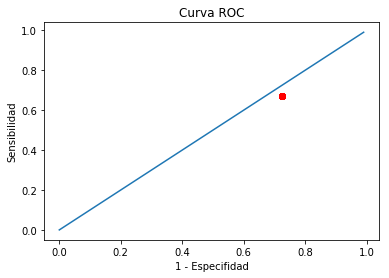

In [144]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker = "o", linestyle = "--", color = "r")
x = [i * 0.01 for i in range(100)]
y = [i * 0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel("1 - Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")